<a href="https://colab.research.google.com/github/afham123/Deep-Learning-Project/blob/main/Image_classification_(fashion_mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.datasets import fashion_mnist

In [4]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [22]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

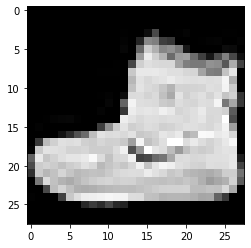

In [7]:
single_img=X_train[0]
plt.imshow(single_img,cmap='gray')

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
temp_df=pd.DataFrame(y_train)
temp_df[0].unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)

In [13]:
from keras.utils.np_utils import to_categorical
cat_y_test=to_categorical(y_test)
cat_y_train=to_categorical(y_train)

In [14]:
X_train=X_train/255
X_test=X_test/255

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten

In [24]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1),activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

In [25]:
model.fit(X_train,cat_y_train,epochs=10,validation_data=(X_test,cat_y_test))

Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.6802 - accuracy: 0.7461 - val_loss: 0.3730 - val_accuracy: 0.8675
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3508 - accuracy: 0.8712 - val_loss: 0.3995 - val_accuracy: 0.8684
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3431 - accuracy: 0.8807 - val_loss: 0.4308 - val_accuracy: 0.8548
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3468 - accuracy: 0.8793 - val_loss: 0.4373 - val_accuracy: 0.8610
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3668 - accuracy: 0.8732 - val_loss: 0.4366 - val_accuracy: 0.8523
Epoch 6/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3721 - accuracy: 0.8736 - val_loss: 0.4191 - val_accuracy: 0.8640
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3733 - accuracy: 0.8717 - val_loss: 0.5717 -

In [33]:
predictions=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [26]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.494909,0.818817,0.373009,0.8675
1,0.347031,0.874783,0.399451,0.8684
2,0.346301,0.879517,0.430837,0.8548
3,0.357191,0.875850,0.437289,0.8610
4,0.368946,0.872017,0.436603,0.8523


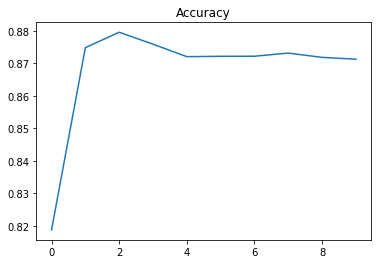

In [27]:
plt.plot(loss_df['accuracy'])
plt.title('Accuracy')
plt.show()

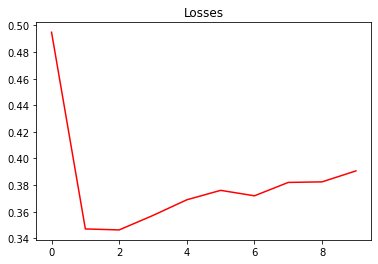

In [28]:
plt.plot(loss_df['loss'],color='red')
plt.title('Losses')
plt.show()

In [30]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1000
           1       1.00      0.96      0.98      1000
           2       0.77      0.84      0.80      1000
           3       0.89      0.89      0.89      1000
           4       0.82      0.74      0.77      1000
           5       0.95      0.98      0.96      1000
           6       0.60      0.61      0.60      1000
           7       0.98      0.83      0.90      1000
           8       1.00      0.89      0.94      1000
           9       0.87      0.98      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [36]:
print(accuracy_score(y_test,predictions))

0.8598


In [37]:
print(confusion_matrix(y_test,predictions))

[[876   0  12  17   3   2  89   0   1   0]
 [  4 965   1  15   2   0  12   0   1   0]
 [ 14   0 836   5  47   0  97   0   1   0]
 [ 18   3  12 889  23   0  55   0   0   0]
 [  0   0 125  43 736   0  96   0   0   0]
 [  1   0   0   0   0 977   0  10   0  12]
 [196   0  94  20  82   0 607   0   1   0]
 [  0   0   0   0   0  33   0 835   0 132]
 [ 24   0  12   5   8   4  52   2 892   1]
 [  0   0   0   0   0  11   1   3   0 985]]


In [38]:
lst1=[]
lst2=[]

for i in range(10):
  lst1.append('Predictes_'+str(i))
  lst2.append('Actually_'+str(i))
lst1

['Predictes_0',
 'Predictes_1',
 'Predictes_2',
 'Predictes_3',
 'Predictes_4',
 'Predictes_5',
 'Predictes_6',
 'Predictes_7',
 'Predictes_8',
 'Predictes_9']

In [39]:
confusion_matrix_df=pd.DataFrame(index=lst2,columns=lst1,data=confusion_matrix(y_test,predictions))
confusion_matrix_df

,Predictes_0,Predictes_1,Predictes_2,Predictes_3,Predictes_4,Predictes_5,Predictes_6,Predictes_7,Predictes_8,Predictes_9
Actually_0,876,0,12,17,3,2,89,0,1,0
Actually_1,4,965,1,15,2,0,12,0,1,0
Actually_2,14,0,836,5,47,0,97,0,1,0
Actually_3,18,3,12,889,23,0,55,0,0,0
Actually_4,0,0,125,43,736,0,96,0,0,0
Actually_5,1,0,0,0,0,977,0,10,0,12
Actually_6,196,0,94,20,82,0,607,0,1,0
Actually_7,0,0,0,0,0,33,0,835,0,132
Actually_8,24,0,12,5,8,4,52,2,892,1
Actually_9,0,0,0,0,0,11,1,3,0,985


In [41]:
model.save('My_model.h5')